In [1]:
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("../../../data/03_training_set/training_set.pkl")
X = data.drop(['new_watchers'], axis=1)
y = data['new_watchers']
s = StandardScaler()
X = s.fit_transform(X)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20, random_state=42)

# Inne modele

Na próbę chciałem uruchomić uczenie na modelach niedostosowanych do regresji danych którymi dysponuje. Zarówno w przypadku regresji liniowej, jak i maszyny wektorów nośnych, wyniki są na tyle złe, że nie ma podstaw wykonywać ich głębszej analizy.

### Regresja liniowa

In [3]:
from sklearn.linear_model import LinearRegression

mean_squared_error: 257.800307226784
train score: 0.018711741434586315
test score: 0.032321256156874534


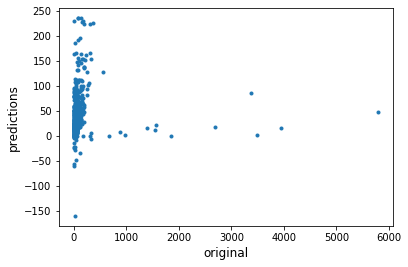

In [4]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# podsumowanie wynikow
y_pred_default = linear_regression.predict(X_test)
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred_default)}')
print(f'train score: {linear_regression.score(X_train, y_train)}')
print(f'test score: {linear_regression.score(X_test, y_test)}')
    
# wizualizacja
pred_default = linear_regression.predict(X_test).astype(int)
temp_default = y_test.values > 0
plt.scatter(y_test.values[temp_default], pred_default[temp_default], marker=".")
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.show()

### Maszyna wektorów nośnych

In [5]:
from sklearn.svm import LinearSVR

[LibLinear]

D:\Programy\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


mean_squared_error: 261.21189646548
train score: 0.014887801020131874
test score: 0.019515521266473823


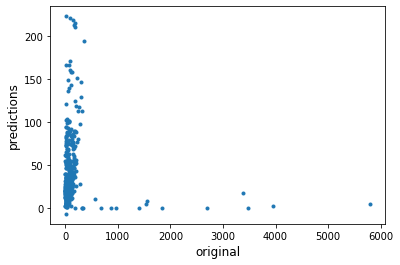

In [6]:
linear_svr = LinearSVR(verbose=1)
linear_svr.fit(X_train, y_train)

# podsumowanie wynikow
y_pred_default = linear_svr.predict(X_test)
print(f'mean_squared_error: {mean_squared_error(y_test, y_pred_default)}')
print(f'train score: {linear_svr.score(X_train, y_train)}')
print(f'test score: {linear_svr.score(X_test, y_test)}')
    
# wizualizacja
pred_default = linear_svr.predict(X_test).astype(int)
temp_default = y_test.values > 0
plt.scatter(y_test.values[temp_default], pred_default[temp_default], marker=".")
plt.xlabel("original", fontsize=12)
plt.ylabel("predictions", fontsize=12)
plt.show()